## Analysis of the Results so far

So far four prediction runs have been executed. The first one only used ECFPs the second one used cell painting data from bray et al. The third and fourth one used only selected features from the ECFPs and cell painting. The difference between these two is the kind of SMOTE algorithm used. One uses the NC algorithm that is suitable for numerical and categorical features (hence the N and C) and the other one is the default that is only suitable for numerical features. In this notebook the following steps are undertaken:

1. Prerequisite
2. Plotting and comparing the Prediction Performance
3. Analysis of Microscopy Channel Enrichments
4. Analysis of Annotation Enrichments


### 1. Prerequisite
- import packages
- read data from disc
- sort data frames

In [1]:
import os
import re
import math
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from sklearn.preprocessing import StandardScaler

plt.rcParams["font.family"] = "Charter"

In [6]:
# import the summary results of the different predictions
cp_only = pd.read_csv('../../05-PredictCellPainting/_output/summary_results.txt',sep='\t', header=1)
fp_only = pd.read_csv('../../04-PredictFingerprints/_output/summary_results.txt',sep='\t', header=1)
cpfp_nc = pd.read_csv('../../08-PredictFPCP/_output/summary_results.txt',sep='\t', header=1)
cpfp_no = pd.read_csv('../../09-PredictFPCP_SMOTE/_output/summary_results.txt',sep='\t', header=1)
cpfpall = pd.read_csv('../../09-PredictFPCP_SMOTE/_output/summary_results.txt',sep='\t', header=1)

# sort the assays by prediction performance of the cp-only prediction
cp_only.sort_values(by='AUC-Sc', ascending=False, inplace=True)


high_pred = [720532, 651635, 624297,   2330, 743014, 588855, 743012, 624296,
       743015,   1578, 504444, 651744]
# make list with assays that showed lower performance using CP data
low_pred = [720582, 602340, 720635,1531,1688,2642,651610,588852,624466,1822,624256,777,2553,938,720648,651658,504660,2540,2216,504582,485270,2599,504847,624202,588334,2796,2156,485313,504333,588458,932,504652,894,1458,720504,504466,485314,1529,2098,1030]

In [7]:
# sort the prediction of the fingerprints-only predictions according to the sorting in the cp-only predictions
fp_only = fp_only.set_index('AID')
fp_only = fp_only.reindex(index=cp_only['AID'])
fp_only = fp_only.reset_index()

# sort the combined feature sets with SMOTE-NC sampling according to cp-only predictions performance
cpfp_nc = cpfp_nc.set_index('AID')
cpfp_nc = cpfp_nc.reindex(index=cp_only['AID'])
cpfp_nc = cpfp_nc.reset_index()

# sort the combined feature sets with SMOTE sampling according to cp-only predictions performance
cpfp_no = cpfp_no.set_index('AID')
cpfp_no = cpfp_no.reindex(index=cp_only['AID'])
cpfp_no = cpfp_no.reset_index()

# sort the combined feature sets with all features
cpfpall = cpfp_no.set_index('AID')
cpfpall = cpfp_no.reindex(index=cp_only['AID'])
cpfpall = cpfp_no.reset_index()

### 2. Plotting and comparing the Prediction Performance

1. Plot Differences in AUC-ROC values from different predictions
2. Plot Differences in Balanced ACcuracy values from different predictions
3. Plot Differences in Matthews Coefficient values from different predictions
4. Plot Differences in Sensitivity values from different predictions
5. Plot Differences in Specificity values from different predictions

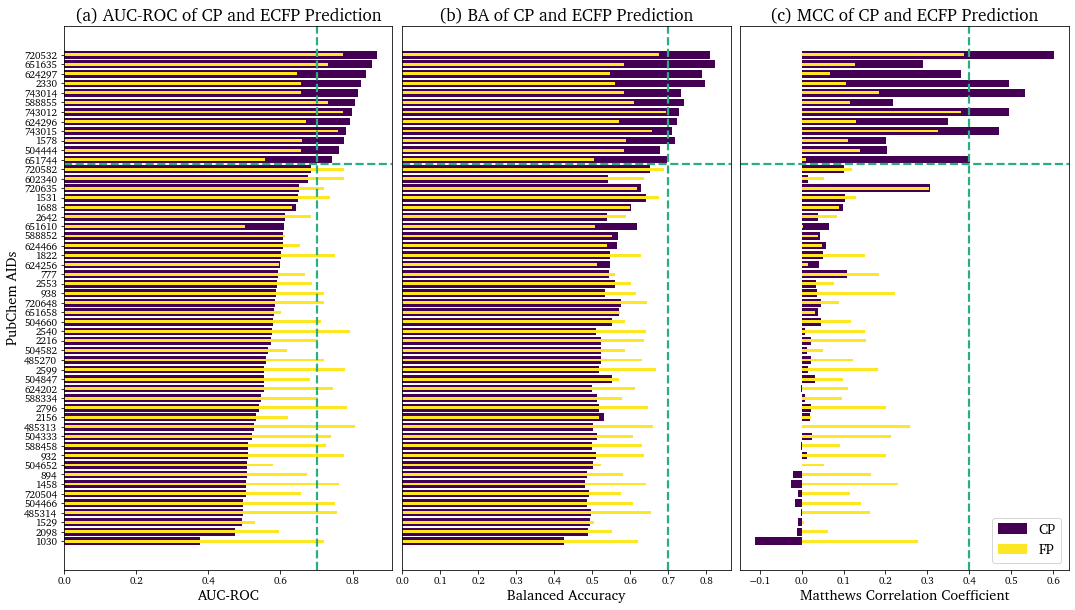

In [8]:
# declare the AUCs for plotting them (see below)
val1 = cp_only['AUC-Sc'].values
val2 = cp_only['BalAcc'].values
val3 = cp_only['MatCff'].values
val4 = fp_only['AUC-Sc'].values
val5 = fp_only['BalAcc'].values
val6 = fp_only['MatCff'].values


# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax1, ax2,ax3) = plt.subplots(1,3,num=5, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax1.barh(yticks, val1,label='CP AUC',tick_label=cp_only.iloc[:,0].values, color='#440154ff')
ax1.barh(yticks, val4,label='FP AUC',height=0.3, color='#fde725ff')
ax2.barh(yticks, val2,label='CP BalACc',color='#440154ff')
ax2.barh(yticks, val5,label='FP BalAcc',height=0.3, color='#fde725ff')
ax3.barh(yticks, val3,label='CP',color='#440154ff',)
ax3.barh(yticks, val6,label='FP',height=0.3, color='#fde725ff')

# title of the axis
ax1.set_title('(a) AUC-ROC of CP and ECFP Prediction', **char_font,fontsize='xx-large')
ax2.set_title('(b) BA of CP and ECFP Prediction', **char_font,fontsize='xx-large')
ax3.set_title('(c) MCC of CP and ECFP Prediction', **char_font,fontsize='xx-large')

# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax1.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('AUC-ROC',fontsize='x-large')
ax2.set_xlabel('Balanced Accuracy',fontsize='x-large')
ax3.set_xlabel('Matthews Correlation Coefficient',fontsize='x-large')

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax1.axvline(x=0.7, ymin=0, ymax=1,color='#29af7fff', linestyle='--', linewidth=2.2)
ax2.axvline(x=0.7, ymin=0, ymax=1,color='#29af7fff', linestyle='--', linewidth=2.2)
ax3.axvline(x=0.4, ymin=0, ymax=1,color='#29af7fff', linestyle='--', linewidth=2.2)

ax1.axhline(y=11.5, xmin=0, xmax=1,color='#29af7fff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#29af7fff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#29af7fff', linestyle='--', linewidth=2.2)

ax3.legend(loc=4, fontsize='x-large')

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0)
# save the figure to the _output directory
#plt.savefig('../_output/cp_fp_comparison.svg',bbox_inches='tight')
#plt.savefig('../_output/cp_fp_comparison.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

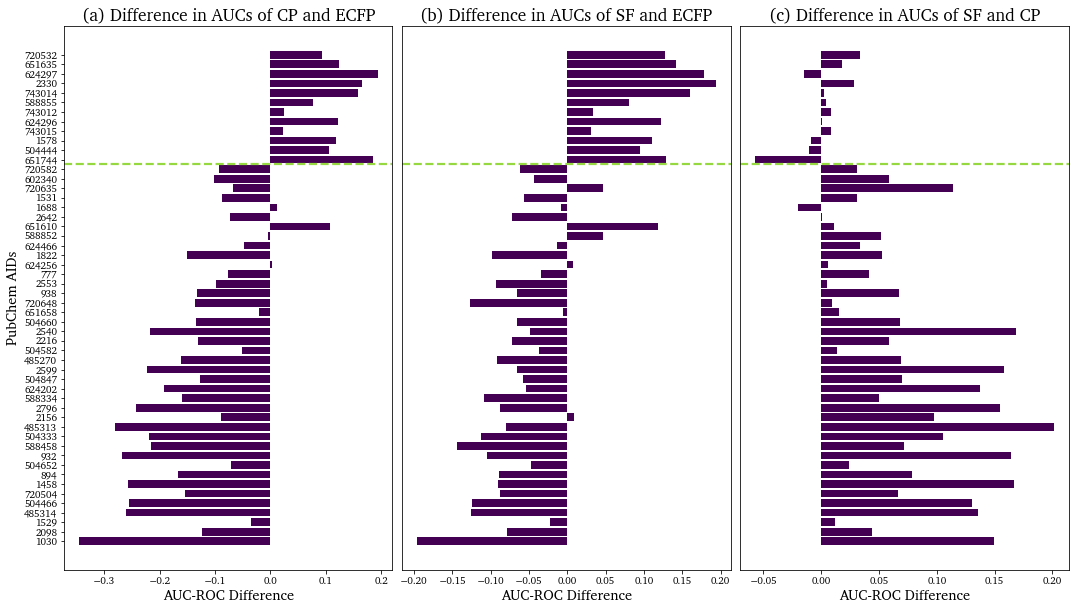

In [5]:
# declare the AUCs for plotting them (see below)
val1 = cp_only['AUC-Sc'].values
val2 = fp_only['AUC-Sc'].values
val3 = cpfp_nc['AUC-Sc'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax1, ax2,ax3) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax1.barh(yticks, val1-val2,label='CP-FP',tick_label=cp_only.iloc[:,0].values,color='#440154ff')
ax2.barh(yticks, val3-val2,label='CPFP-FP',color='#440154ff')
ax3.barh(yticks, val3-val1,label='CPFP-CP',color='#440154ff')


# title of the axis
ax1.set_title('(a) Difference in AUCs of CP and ECFP', **char_font,fontsize='xx-large')
ax2.set_title('(b) Difference in AUCs of SF and ECFP', **char_font,fontsize='xx-large')
ax3.set_title('(c) Difference in AUCs of SF and CP', **char_font,fontsize='xx-large')

# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax1.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('AUC-ROC Difference',fontsize='x-large')
ax2.set_xlabel('AUC-ROC Difference',fontsize='x-large')
ax3.set_xlabel('AUC-ROC Difference',fontsize='x-large')

ax1.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)


# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/AUCComparison.svg',bbox_inches='tight')
#plt.savefig('../_output/AUCComparison.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

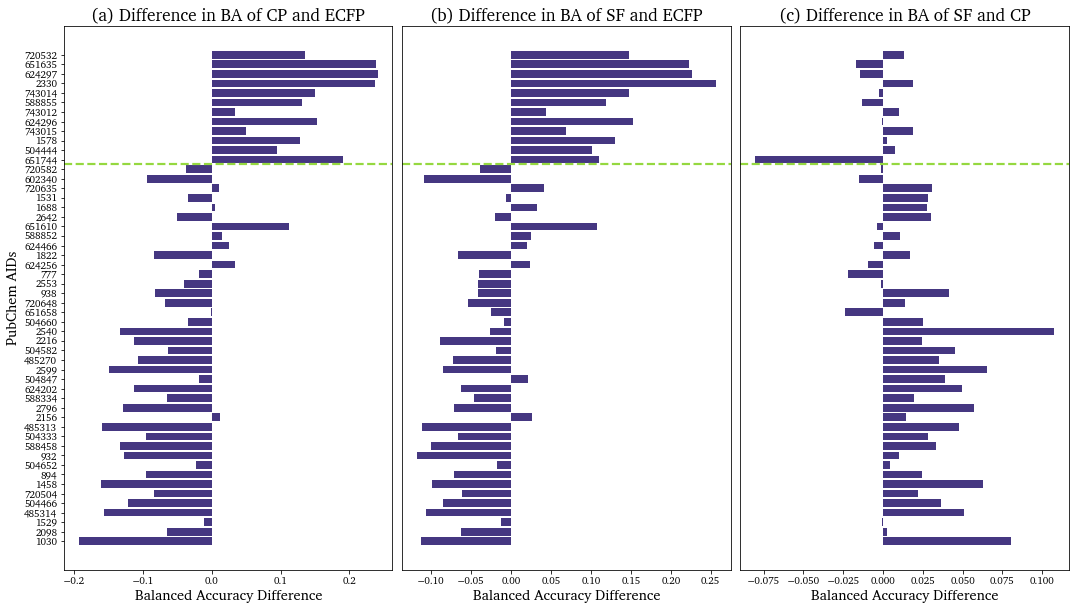

In [6]:
# declare the BalAccs for plotting them (see below)
val1 = cp_only['BalAcc'].values
val2 = fp_only['BalAcc'].values
val3 = cpfp_nc['BalAcc'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax1, ax2,ax3) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax1.barh(yticks, val1-val2,label='CP-FP',tick_label=cp_only.iloc[:,0].values,color='#453781ff')
ax2.barh(yticks, val3-val2,label='CPFP-FP',color='#453781ff')
ax3.barh(yticks, val3-val1,label='CPFP-CP',color='#453781ff')

# title of the axis
ax1.set_title('(a) Difference in BA of CP and ECFP', **char_font, fontsize='xx-large')
ax2.set_title('(b) Difference in BA of SF and ECFP', **char_font, fontsize='xx-large')
ax3.set_title('(c) Difference in BA of SF and CP', **char_font, fontsize='xx-large')

# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax1.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)

ax1.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('Balanced Accuracy Difference',fontsize='x-large')
ax2.set_xlabel('Balanced Accuracy Difference',fontsize='x-large')
ax3.set_xlabel('Balanced Accuracy Difference',fontsize='x-large')

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/BalAccComparison.svg',bbox_inches='tight')
#plt.savefig('../_output/BalAccComparison.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

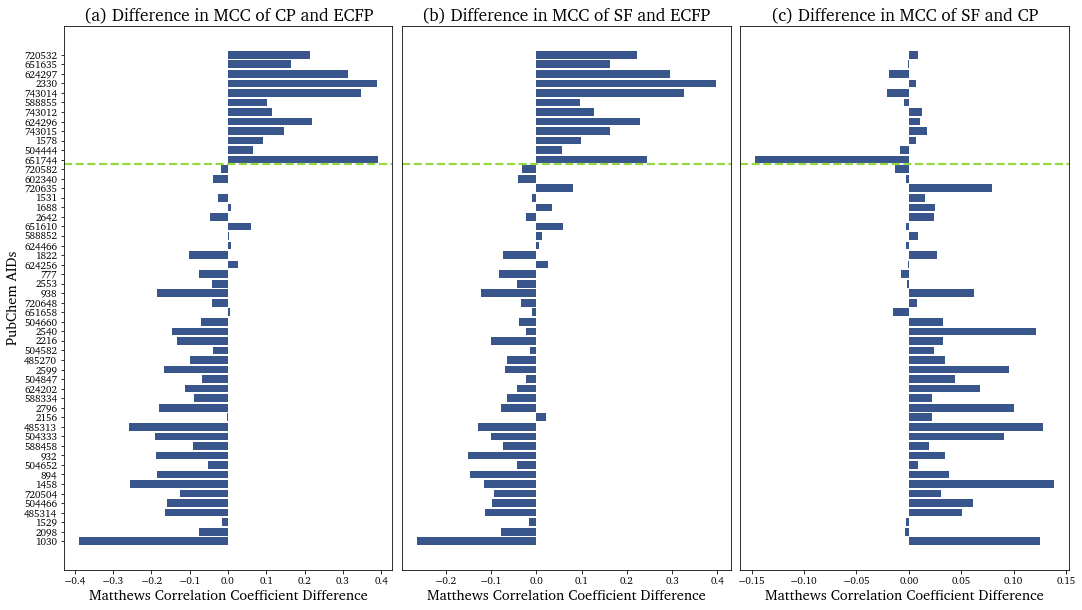

In [7]:
# declare the MatCffs for plotting them (see below)
val1 = cp_only['MatCff'].values
val2 = fp_only['MatCff'].values
val3 = cpfp_nc['MatCff'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax1, ax2,ax3) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax1.barh(yticks, val1-val2,label='CP-FP',tick_label=cp_only.iloc[:,0].values, color='#39568cff')
ax2.barh(yticks, val3-val2,label='CPFP-FP', color='#39568cff')
ax3.barh(yticks, val3-val1,label='CPFP-CP', color='#39568cff')

#33638dff
#2D708eff
#287d8eff
#238a8dff
#1f968bff
#20a387ff
#29af7fff
#3cbb75ff

# title of the axis
ax1.set_title('(a) Difference in MCC of CP and ECFP', **char_font, fontsize='xx-large')
ax2.set_title('(b) Difference in MCC of SF and ECFP', **char_font, fontsize='xx-large')
ax3.set_title('(c) Difference in MCC of SF and CP', **char_font, fontsize='xx-large')

# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax1.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)

ax1.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('Matthews Correlation Coefficient Difference',fontsize='x-large')
ax2.set_xlabel('Matthews Correlation Coefficient Difference',fontsize='x-large')
ax3.set_xlabel('Matthews Correlation Coefficient Difference',fontsize='x-large')

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/MatCffComparison.svg',bbox_inches='tight')
#plt.savefig('../_output/MatCffComparison.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

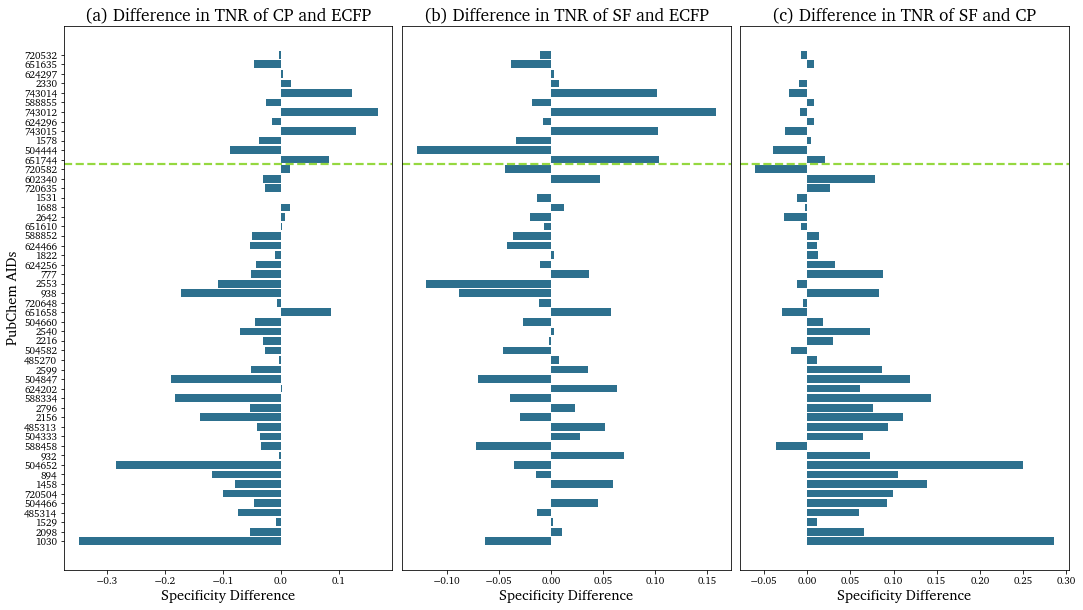

In [8]:
# declare the Specif for plotting them (see below)
val1 = cp_only['Specif'].values
val2 = fp_only['Specif'].values
val3 = cpfp_nc['Specif'].values
val4 = cpfpall['Specif'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax1,ax2,ax3) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax1.barh(yticks, val1-val2,label='CP-FP',tick_label=cp_only.iloc[:,0].values, color='#2D708eff')
ax2.barh(yticks, val3-val2,label='CPFP-FP', color='#2D708eff')
ax3.barh(yticks, val3-val1,label='CPFP-CP', color='#2D708eff')


#238a8dff
#1f968bff
#20a387ff
#29af7fff
#3cbb75ff

ax1.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)

ax1.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('Specificity Difference',fontsize='x-large')
ax2.set_xlabel('Specificity Difference',fontsize='x-large')
ax3.set_xlabel('Specificity Difference',fontsize='x-large')

# title of the axis
ax1.set_title('(a) Difference in TNR of CP and ECFP', **char_font, fontsize='xx-large')
ax2.set_title('(b) Difference in TNR of SF and ECFP', **char_font, fontsize='xx-large')
ax3.set_title('(c) Difference in TNR of SF and CP', **char_font, fontsize='xx-large')

# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/SpecifComparison.pdf',bbox_inches='tight')
#plt.savefig('../_output/SpecifComparison.svg',bbox_inches='tight')
# show the damn plot
plt.show()

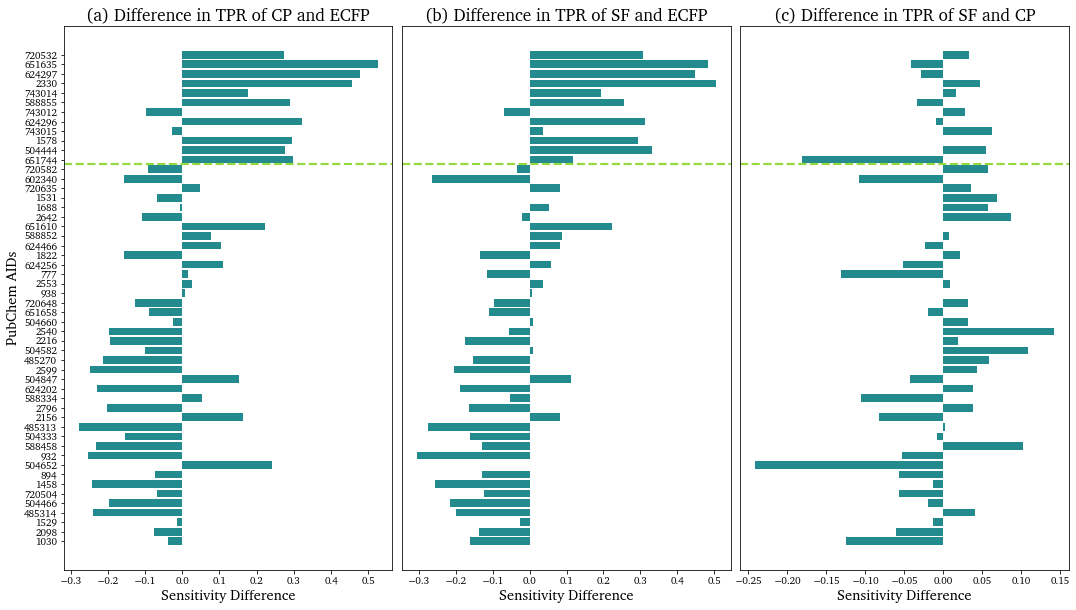

In [9]:
# declare the Sensits for plotting them (see below)
val1 = cp_only['Sensit'].values
val2 = fp_only['Sensit'].values
val3 = cpfp_nc['Sensit'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax1,ax2,ax3) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax1.barh(yticks, val1-val2,label='CP-FP',tick_label=cp_only.iloc[:,0].values, color='#238a8dff')
ax2.barh(yticks, val3-val2,label='CPFP-FP', color='#238a8dff')
ax3.barh(yticks, val3-val1,label='CPFP-CP', color='#238a8dff')

# title of the axis
ax1.set_title('(a) Difference in TPR of CP and ECFP', **char_font, fontsize='xx-large')
ax2.set_title('(b) Difference in TPR of SF and ECFP', **char_font, fontsize='xx-large')
ax3.set_title('(c) Difference in TPR of SF and CP', **char_font, fontsize='xx-large')


# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax1.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('Sensitivity Difference',fontsize='x-large')
ax2.set_xlabel('Sensitivity Difference',fontsize='x-large')
ax3.set_xlabel('Sensitivity Difference',fontsize='x-large')

ax1.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#95D840ff', linestyle='--', linewidth=2.2)

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/SensitComparison.svg',bbox_inches='tight')
#plt.savefig('../_output/SensitComparison.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

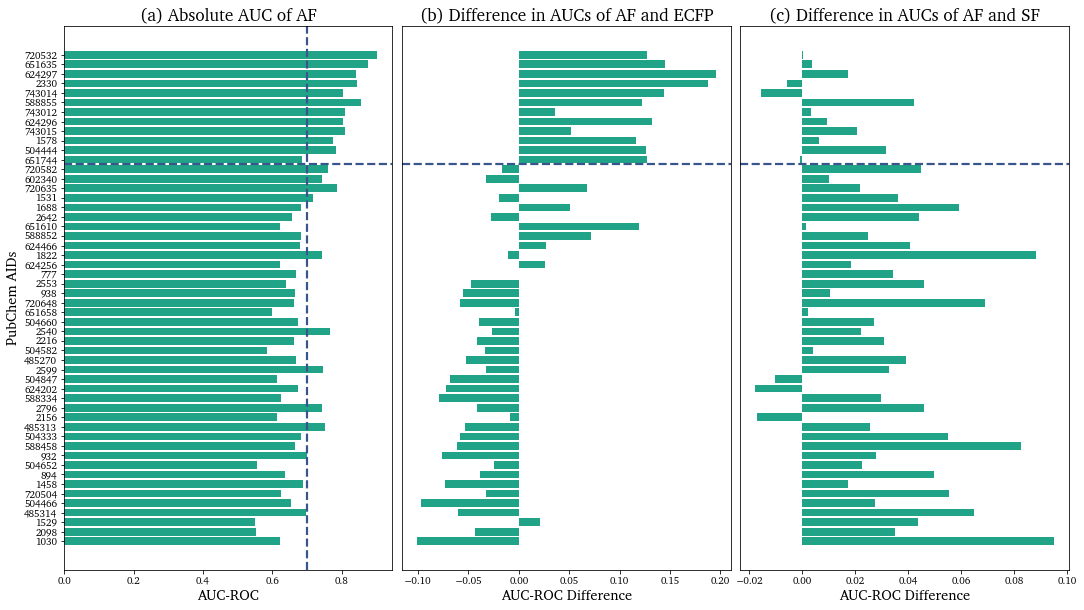

In [10]:
# declare the Sensits for plotting them (see below)
val1 = cp_only['AUC-Sc'].values
val2 = fp_only['AUC-Sc'].values
val3 = cpfp_nc['AUC-Sc'].values
val4 = cpfpall['AUC-Sc'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax3,ax1, ax2) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax3.barh(yticks, val4,label='CPall',color='#20a387ff',tick_label=cp_only.iloc[:,0].values)
ax1.barh(yticks, val4-val2,label='CPall-FP',color='#20a387ff')
ax2.barh(yticks, val4-val3,label='CPall-CPFP',color='#20a387ff')

# title of the axis
ax3.set_title('(a) Absolute AUC of AF', fontsize='xx-large',**char_font)
ax1.set_title('(b) Difference in AUCs of AF and ECFP', fontsize='xx-large',**char_font)
ax2.set_title('(c) Difference in AUCs of AF and SF', fontsize='xx-large',**char_font)


# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('AUC-ROC Difference',fontsize='x-large')
ax2.set_xlabel('AUC-ROC Difference',fontsize='x-large')
ax3.set_xlabel('AUC-ROC',fontsize='x-large')


ax1.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax3.axvline(x=0.7, ymin=0, ymax=1,color='#39568cff', linestyle='--', linewidth=2.2)

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/completefeaturesAUCs.svg',bbox_inches='tight')
#plt.savefig('../_output/completefeaturesAUCs.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

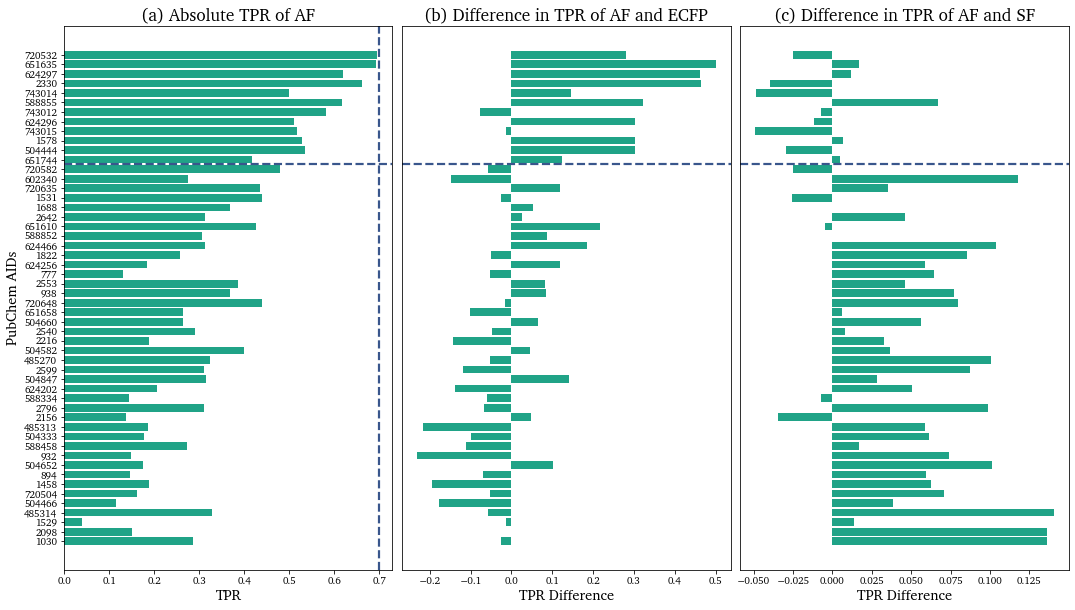

In [11]:
# declare the Sensits for plotting them (see below)
val1 = cp_only['Sensit'].values
val2 = fp_only['Sensit'].values
val3 = cpfp_nc['Sensit'].values
val4 = cpfpall['Sensit'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax3,ax1, ax2) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax3.barh(yticks, val4,label='CPall',color='#20a387ff',tick_label=cp_only.iloc[:,0].values)
ax1.barh(yticks, val4-val2,label='CPall-FP',color='#20a387ff')
ax2.barh(yticks, val4-val3,label='CPall-CPFP',color='#20a387ff')

# title of the axis
ax3.set_title('(a) Absolute TPR of AF', fontsize='xx-large',**char_font)
ax1.set_title('(b) Difference in TPR of AF and ECFP', fontsize='xx-large',**char_font)
ax2.set_title('(c) Difference in TPR of AF and SF', fontsize='xx-large',**char_font)


# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('TPR Difference',fontsize='x-large')
ax2.set_xlabel('TPR Difference',fontsize='x-large')
ax3.set_xlabel('TPR',fontsize='x-large')


ax1.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax3.axvline(x=0.7, ymin=0, ymax=1,color='#39568cff', linestyle='--', linewidth=2.2)

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/completefeaturesSensit.svg',bbox_inches='tight')
#plt.savefig('../_output/completefeaturesSensit.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

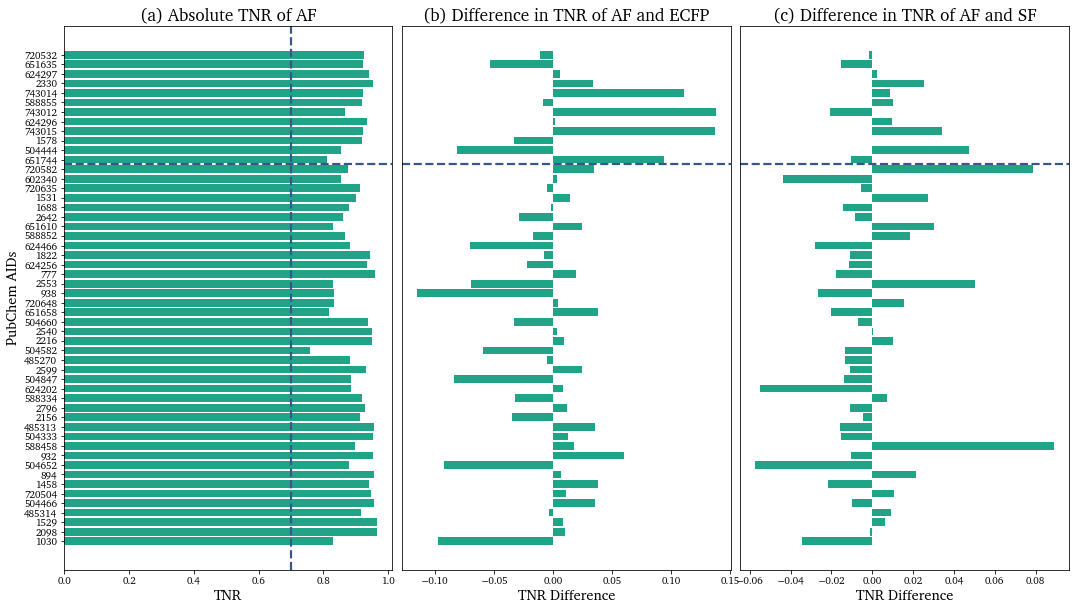

In [12]:
# declare the Sensits for plotting them (see below)
val1 = cp_only['Specif'].values
val2 = fp_only['Specif'].values
val3 = cpfp_nc['Specif'].values
val4 = cpfpall['Specif'].values

# meta data specifications for the plot
ylabels = cp_only.iloc[:,0].values
yticks = np.arange(len(ylabels))
num_font = {'fontname':'Times New Roman'}
char_font = {'fontname':'Charter'}

# instantiate the figure and the axis
fig, (ax3,ax1, ax2) = plt.subplots(1,3,num=0, figsize=[18,10])

# make the horizontal bar plots from the differences of certain AUCs for a better comparison
ax3.barh(yticks, val4,label='CPall',color='#20a387ff',tick_label=cp_only.iloc[:,0].values)
ax1.barh(yticks, val4-val2,label='CPall-FP',color='#20a387ff')
ax2.barh(yticks, val4-val3,label='CPall-CPFP',color='#20a387ff')

# title of the axis
ax3.set_title('(a) Absolute TNR of AF', fontsize='xx-large',**char_font)
ax1.set_title('(b) Difference in TNR of AF and ECFP', fontsize='xx-large',**char_font)
ax2.set_title('(c) Difference in TNR of AF and SF', fontsize='xx-large',**char_font)


# invert the y axis, because it feels more natural that way
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

# the y labels are the same for every plot therefore it can be omitted for the latter plots
ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax3.set_ylabel('PubChem AIDs',fontsize='x-large')
ax1.set_xlabel('TNR Difference',fontsize='x-large')
ax2.set_xlabel('TNR Difference',fontsize='x-large')
ax3.set_xlabel('TNR',fontsize='x-large')


ax1.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax2.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax3.axhline(y=11.5, xmin=0, xmax=1,color='#39568cff', linestyle='--', linewidth=2.2)
ax3.axvline(x=0.7, ymin=0, ymax=1,color='#39568cff', linestyle='--', linewidth=2.2)

# move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.1)
# save the figure to the _output directory
#plt.savefig('../_output/completefeaturesSpecif.svg',bbox_inches='tight')
#plt.savefig('../_output/completefeaturesSpecif.pdf',bbox_inches='tight')
# show the damn plot
plt.show()

In [10]:
def lims(vals1,vals2,vals3,vals4):
    
    min_list = [vals1.min(),vals2.min(),vals3.min(),vals4.min()]
    max_list = [vals1.max(),vals2.max(),vals3.max(),vals4.max()]
    
    xmin = min(min_list) - min(min_list)*0.01
    xmax = max(max_list) + max(max_list)*0.01
        
    return xmin, xmax
    

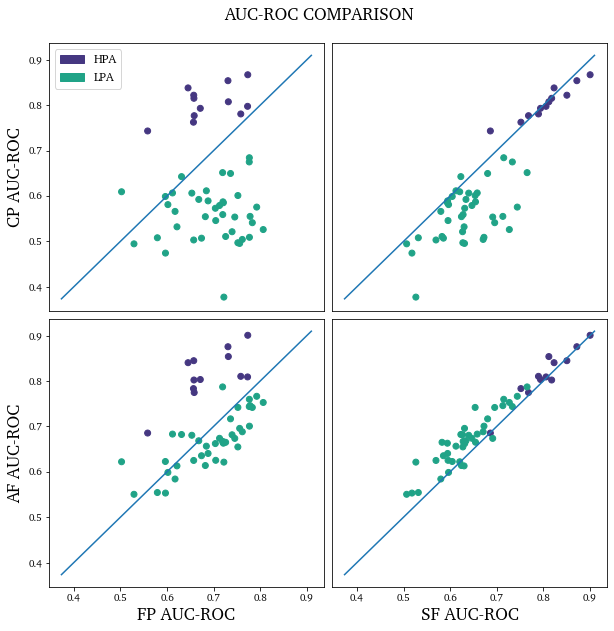

In [11]:
### zu beantwortende fragen: ist CP besser als FP? sind SF besser als CP und AF?

# declare the Sensits for plotting them (see below)
cp = cp_only['AUC-Sc'].values
fp = fp_only['AUC-Sc'].values
sf = cpfp_nc['AUC-Sc'].values
af = cpfpall['AUC-Sc'].values

# prepare colors
cmap=['#20a387ff','#453781ff']
c = [cmap[i] for i in cp_only.AID.isin(high_pred).astype('int').to_list()]

# instantiate the figure and the axis
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,num=0, figsize=[10,10])

fig = plt.gcf()
fig.suptitle("AUC-ROC COMPARISON",y=0.93, fontsize='xx-large')

limit = lims(cp,fp,sf,af)

ax1.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax2.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax3.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax4.plot([limit[0],limit[1]],[limit[0],limit[1]])

# plot scatter plots
ax1.scatter(x=fp, y=cp,label=c ,color=c)
ax2.scatter(x=sf, y=cp,label='CPall',color=c)
ax3.scatter(x=fp, y=af,label='CPall',color=c)
ax4.scatter(x=sf, y=af,label='CPall',color=c)

ax3.set_xlabel('FP AUC-ROC',fontsize='xx-large')
ax4.set_xlabel('SF AUC-ROC',fontsize='xx-large')
ax1.set_ylabel('CP AUC-ROC',fontsize='xx-large')
ax3.set_ylabel('AF AUC-ROC',fontsize='xx-large')

hpa = mpatches.Patch(color='#453781ff', label='HPA')
lpa = mpatches.Patch(color='#20a387ff', label='LPA')
ax1.legend(handles=[hpa,lpa],fontsize='large')

ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# # move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.03)

# save the figure to the _output directory
plt.savefig('../_output/scatter_comparisonAUC.svg',bbox_inches='tight')
plt.savefig('../_output/scatter_comparisonAUC.png',bbox_inches='tight')
# show the damn plot
plt.show()

NameError: name 'lims' is not defined

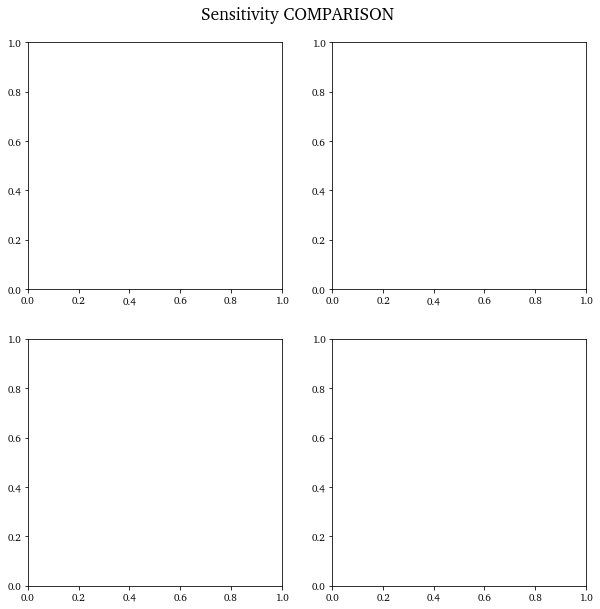

In [9]:
### zu beantwortende fragen: ist CP besser als FP? sind SF besser als CP und AF?

# declare the Sensits for plotting them (see below)
cp = cp_only['Sensit'].values
fp = fp_only['Sensit'].values
sf = cpfp_nc['Sensit'].values
af = cpfpall['Sensit'].values

# prepare colors
cmap=['#20a387ff','#453781ff']
c = [cmap[i] for i in cp_only.AID.isin(high_pred).astype('int').to_list()]

# instantiate the figure and the axis
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,num=0, figsize=[10,10])

fig = plt.gcf()
fig.suptitle("Sensitivity COMPARISON",y=0.93, fontsize='xx-large')

limit = lims(cp,fp,sf,af)

ax1.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax2.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax3.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax4.plot([limit[0],limit[1]],[limit[0],limit[1]])

# plot scatter plots
ax1.scatter(x=fp, y=cp, color=c)
ax2.scatter(x=sf, y=cp, color=c)
ax3.scatter(x=fp, y=af, color=c)
ax4.scatter(x=sf, y=af, color=c)

ax3.set_xlabel('FP Sensitivity',fontsize='xx-large')
ax4.set_xlabel('SF Sensitivity',fontsize='xx-large')
ax1.set_ylabel('CP Sensitivity',fontsize='xx-large')
ax3.set_ylabel('AF Sensitivity',fontsize='xx-large')

hpa = mpatches.Patch(color='#453781ff', label='HPA')
lpa = mpatches.Patch(color='#20a387ff', label='LPA')
ax1.legend(handles=[hpa,lpa],fontsize='large')

ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# # move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.03)

# save the figure to the _output directory
plt.savefig('../_output/scatter_comparisonTPR.svg',bbox_inches='tight')
plt.savefig('../_output/scatter_comparisonTPR.png',bbox_inches='tight')
# show the damn plot
plt.show()

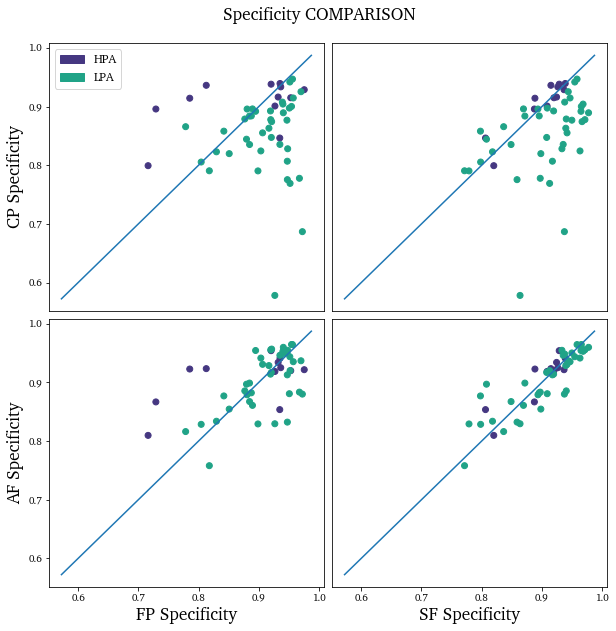

In [143]:
### zu beantwortende fragen: ist CP besser als FP? sind SF besser als CP und AF?

# declare the Sensits for plotting them (see below)
cp = cp_only['Specif'].values
fp = fp_only['Specif'].values
sf = cpfp_nc['Specif'].values
af = cpfpall['Specif'].values

# prepare colors
cmap=['#20a387ff','#453781ff']
c = [cmap[i] for i in cp_only.AID.isin(high_pred).astype('int').to_list()]

# instantiate the figure and the axis
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,num=0, figsize=[10,10])

fig = plt.gcf()
fig.suptitle("Specificity COMPARISON",y=0.93, fontsize='xx-large')

limit = lims(cp,fp,sf,af)

ax1.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax2.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax3.plot([limit[0],limit[1]],[limit[0],limit[1]])
ax4.plot([limit[0],limit[1]],[limit[0],limit[1]])

# plot scatter plots
ax1.scatter(x=fp, y=cp, color=c)
ax2.scatter(x=sf, y=cp, color=c)
ax3.scatter(x=fp, y=af, color=c)
ax4.scatter(x=sf, y=af, color=c)

ax3.set_xlabel('FP Specificity',fontsize='xx-large')
ax4.set_xlabel('SF Specificity',fontsize='xx-large')
ax1.set_ylabel('CP Specificity',fontsize='xx-large')
ax3.set_ylabel('AF Specificity',fontsize='xx-large')

hpa = mpatches.Patch(color='#453781ff', label='HPA')
lpa = mpatches.Patch(color='#20a387ff', label='LPA')
ax1.legend(handles=[hpa,lpa],fontsize='large')

ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# # move the subplots closer together and close the gaps almost completely
plt.subplots_adjust(wspace=0.03, hspace=0.03)

# save the figure to the _output directory
plt.savefig('../_output/scatter_comparisonTNR.svg',bbox_inches='tight')
plt.savefig('../_output/scatter_comparisonTNR.png',bbox_inches='tight')
# show the damn plot
plt.show()

In [148]:
# looking at the different average gain or loss of the different evaluation metrics
cp_fp_auc = cp_only['AUC-Sc'].values - fp_only['AUC-Sc'].values
comb_fp_auc = cpfp_nc['AUC-Sc'].values - fp_only['AUC-Sc'].values
comb_cp_auc = cpfp_nc['AUC-Sc'].values - cp_only['AUC-Sc'].values

cp_fp_balacc = cp_only['BalAcc'].values - fp_only['BalAcc'].values
comb_fp_balacc = cpfp_nc['BalAcc'].values - fp_only['BalAcc'].values
comb_cp_balacc = cpfp_nc['BalAcc'].values - cp_only['BalAcc'].values

cp_fp_matcff = cp_only['MatCff'].values - fp_only['MatCff'].values
comb_fp_matcff = cpfp_nc['MatCff'].values - fp_only['MatCff'].values
comb_cp_matcff = cpfp_nc['MatCff'].values - cp_only['MatCff'].values

cp_fp_sensit = cp_only['Sensit'].values - fp_only['Sensit'].values
comb_fp_sensit = cpfp_nc['Sensit'].values - fp_only['Sensit'].values
comb_cp_sensit = cpfp_nc['Sensit'].values - cp_only['Sensit'].values

cp_fp_specif = cp_only['Specif'].values - fp_only['Specif'].values
comb_fp_specif = cpfp_nc['Specif'].values - fp_only['Specif'].values
comb_cp_specif = cpfp_nc['Specif'].values - cp_only['Specif'].values

print('AUC Comparison')
print(np.mean(cp_fp_auc[:12]),np.mean(comb_fp_auc[:12]),np.mean(comb_cp_auc[:12]))
print(np.mean(cp_fp_auc[12:]),np.mean(comb_fp_auc[12:]),np.mean(comb_cp_auc[12:]))
print('BalAcc Comparison')
print(np.mean(cp_fp_balacc[:12]),np.mean(comb_fp_balacc[:12]),np.mean(comb_cp_balacc[:12]))
print(np.mean(cp_fp_balacc[12:]),np.mean(comb_fp_balacc[12:]),np.mean(comb_cp_balacc[12:]))
print('MatCff Comparison')
print(np.mean(cp_fp_matcff[:12]),np.mean(comb_fp_matcff[:12]),np.mean(comb_cp_matcff[:12]))
print(np.mean(cp_fp_matcff[12:]),np.mean(comb_fp_matcff[12:]),np.mean(comb_cp_matcff[12:]))
print('Sensitivity Comparison')
print(np.mean(cp_fp_sensit[:12]),np.mean(comb_fp_sensit[:12]),np.mean(comb_cp_sensit[:12]))
print(np.mean(cp_fp_sensit[12:]),np.mean(comb_fp_sensit[12:]),np.mean(comb_cp_sensit[12:]))
print('Specificity Comparison')
print(np.mean(cp_fp_specif[:12]),np.mean(comb_fp_specif[:12]),np.mean(comb_cp_specif[:12]))
print(np.mean(cp_fp_specif[12:]),np.mean(comb_fp_specif[12:]),np.mean(comb_cp_specif[12:]))

AUC Comparison
0.11550833333333332 0.11667499999999997 0.0011666666666666676
-0.133675 -0.061065 0.07261
BalAcc Comparison
0.14879166666666663 0.14402500000000004 -0.004766666666666651
-0.06624750000000001 -0.04120000000000003 0.02504749999999999
MatCff Comparison
0.21318333333333336 0.20191666666666663 -0.011266666666666677
-0.09257750000000001 -0.054567500000000005 0.03801
Sensitivity Comparison
0.27208333333333334 0.2677916666666667 -0.0042916666666666615
-0.07125000000000001 -0.07635249999999999 -0.0051024999999999985
Specificity Comparison
0.025483333333333358 0.020233333333333336 -0.005250000000000023
-0.0612525 -0.0060574999999999934 0.055195000000000015


### 3. Analysis of Microscopy Channel Enrichments
1. declare a list that will hold the frequency information from the different microscopy channel
2. iterate through the top feature holding files for each assay
3. write the counts of every channel within the top features to said list
4. calculate relative frequencies and further information from said list and make a dataframe from it
5. transfrom the columns to have average = 0 and standard deviation = +-1
6. calculate the standard deviation for each channel within the set of better performing Assays
7. calculate the standard deviation for each channel within the set of worse performing Assays

In [149]:
# initialize a list that will hold the informations about the microscopy channels connected to the pubchem assays
assays_x_channels = []
# declare directory to extract the AIDs from
directory = '../../02-CorrectingAssays/_output/'

# for loop iterates through all files within the directory (most importantly the files contain all AIDs in use)
for filename in os.listdir(directory):
    # extract the substring that is all integer from the filename (the AID)
    s = re.search(r"\d+(\.\d+)?", filename)
    aid=s.group(0)
    
    # read the most important features from the Cell Painting data set from disc into ram
    # gini impurity, principal component analysis and maximum-relevance-minimum-redundance analysis
    gi_cp = pd.read_csv('../../06-FeatureImportanceCellPainting/_output/gi_rf_cp_'+str(aid)+'.csv')
    pca_cp = pd.read_csv('../../06-FeatureImportanceCellPainting/_output/pca_rf_cp_'+str(aid)+'_top100.txt',header=None)
    mrmr_cp = pd.read_csv('../../06-FeatureImportanceCellPainting/_output/mrmr_rf_cp_'+str(aid)+'_top30.txt',header=None)

    # convert them into list for easier combination
    mrmr_cp_top100 = mrmr_cp[0].to_list()
    pca_cp_top100 = pca_cp.iloc[:,0].to_list()
    gi_cp_top100 = gi_cp.iloc[:100,:].Feature.to_list()
    
    # combine features into a list with only unique features
    cp_top = list(set(pca_cp_top100) | set(gi_cp_top100) | set(mrmr_cp_top100))
    
    # using list comprehension to append all features with the respective substring to corresponding lists
    # e.g. features containing the substring "DNA" are appended to DNA
    # notice that the total lengths of all lists can exceed the number of most important features given in cp_top
    # because a feature can contain more than one substring
    DNA_list = [i for i in cp_top if 'DNA' in i]
    RNA_list = [i for i in cp_top if 'RNA' in i]
    AGP_list = [i for i in cp_top if 'AGP' in i]
    Mito_list = [i for i in cp_top if 'Mito' in i]
    ER_list = [i for i in cp_top if 'ER' in i]
    
    # calculate the total hits generated by the list comprehension using all channels
    total_hits = len(DNA_list) + len(RNA_list) + len(AGP_list) + len(Mito_list) + len(ER_list)
    # append the information to a list that counts the hits within each channel for every pubchem assay (AID)
    assays_x_channels.append([aid,len(DNA_list)/total_hits,len(RNA_list)/total_hits,len(AGP_list)/total_hits,len(Mito_list)/total_hits,len(ER_list)/total_hits])

In [150]:
# top_channels.iloc[:,-3].describe()

In [151]:
# transfer the assay wise channel information into a dataframe for easier data handling
top_channels = pd.DataFrame(assays_x_channels,columns=['aid','DNA','RNA','AGP','Mito','ER'])
# make sure the aid is dtype 'int'
top_channels.aid = top_channels.aid.astype('int')

# define the scaler to use on each individual column; StandardScaler: avg=0; std=+-1
scaler = StandardScaler()

# create columns with transformed channels and for easier trend recognition round the values and multiply with 100 
top_channels[["DNA_transf","RNA_transf","AGP_transf","Mito_transf","ER_transf"]] = scaler.fit_transform(top_channels[['DNA','RNA','AGP','Mito','ER']])
top_channels[["DNA_transf","RNA_transf","AGP_transf","Mito_transf","ER_transf"]] = round(top_channels[["DNA_transf","RNA_transf","AGP_transf","Mito_transf","ER_transf"]],3)*100

In [152]:
# make list with the assays that showed higher performance using CP data
high_pred = [720532, 651635, 624297,   2330, 743014, 588855, 743012, 624296,
       743015,   1578, 504444, 651744]
# make list with assays that showed lower performance using CP data
low_pred = [720582, 602340, 720635,1531,1688,2642,651610,588852,624466,1822,624256,777,2553,938,720648,651658,504660,2540,2216,504582,485270,2599,504847,624202,588334,2796,2156,485313,504333,588458,932,504652,894,1458,720504,504466,485314,1529,2098,1030]

# create a dataframe that hold the aid only and the transformed channel information
top_channels_transf = top_channels[["aid","DNA_transf","RNA_transf","AGP_transf","Mito_transf","ER_transf"]]
top_channels_transf.set_index('aid',inplace=True)

# compute the stand.-dev. for the every channel within the assays that had higher pred.-perf. from Cell Painting
std_channels_high = top_channels_transf.loc[high_pred,:].describe().loc['std',:]
# compute the stand.-dev. for the every channel within the assays that had lower pred.-perf. from Cell Painting
std_channels_low = top_channels_transf.loc[low_pred,:].describe().loc['std',:]
# compute the ratio of the prior two
std_channels_ratio = std_channels_high/std_channels_low

# transfer the information into a data frame for more descriptiveness, easier export and better handling
std_channels = pd.DataFrame([round(std_channels_low,3)]).T
std_channels['high'] = round(std_channels_high,3).to_list()
std_channels['ratio'] = round(std_channels_ratio,3).to_list()
std_channels.rename(columns={'std' : 'low'}, inplace=True)
std_channels = std_channels.T

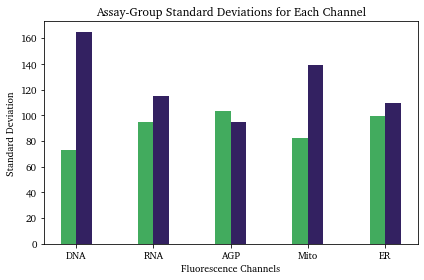

In [153]:
labels = ["DNA","RNA","AGP","Mito","ER"]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, std_channels.iloc[0,:].values, width,color='#42ab5eff', label='lpa')
rects2 = ax.bar(x + width/2, std_channels.iloc[1,:].values, width,color='#332161ff', label='hpa')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Standard Deviation')
ax.set_xlabel('Fluorescence Channels')
ax.set_title('Assay-Group Standard Deviations for Each Channel')
ax.set_xticks(x)
ax.set_xticklabels(labels)



#lt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

fig.tight_layout()

# plt.savefig('../_output/stddev_channels.svg',bbox_inches='tight')
# plt.savefig('../_output/stddev_channels.png',bbox_inches='tight')

plt.show()

In [154]:
std_channels

,DNA_transf,RNA_transf,AGP_transf,Mito_transf,ER_transf
low,72.826,94.684,103.124,82.020,99.702
high,164.780,115.080,95.022,139.055,109.517
ratio,2.263,1.215,0.921,1.695,1.098


In [64]:
#std_channels.to_csv('../_output/channel_stdev_.csv',index=1)
#top_channels.to_csv('../_output/cp_channels_all_info.csv',index=False)

# pd.read_csv('../_output/channel_stdev_.csv',index_col=0)
# pd.read_csv('../_output/cp_channels_all_info.csv')

### 4. Analysis of Annotation Enrichments
The following part of this program utilizes annotations that were given out by me (luis.vollmers@web.de). These annotations were generated before the outcome of the predictions was generated and can therefore be considered unbiased. The goal is to see which annotations are enriched within the assays of higher prediction performance during modelling with CP data as inputs.
1. read the data from disc into ram
2. split into annotations of higher performance and lower performance analogous to step 3 (see above)
3. calculate the frequency information for the annotations within the two mentioned classes
4. output the results

In [155]:
# read interesting annotation columns from the AID_description file
aid_annotation = pd.read_csv('../AID_description.txt', sep='\t',index_col=0, usecols=['AID','Adipgen', 'Ang-gen', 'C-Grwth', 'C-Death', 'Im-Resp', 'Prteom', 'Genome', 'Inflamm','Snscnce','Mei/Mit', 'C-Stres','Signall','CNS/NDD','C-Entry','Mitotox','A-Cancr'])

In [156]:
# split the aid_annotations in the assays that had higher performance using cell painting
annot_high_pred = aid_annotation.loc[high_pred,:]
# split the aid_annotations in the assays that had lower performance using cell painting
annot_low_pred = aid_annotation.loc[low_pred,:]

In [157]:
# calculate the the rel frequency of an annotation per assay for the lower performance set
low_rel_freq = annot_low_pred.sum()/aid_annotation.sum()/annot_low_pred.shape[0]
# calculate the the rel frequency of an annotation per assay for the higher performance set
high_rel_freq = annot_high_pred.sum()/aid_annotation.sum()/annot_high_pred.shape[0]
# calculate the difference between the two for better performance
diff_rel_freq = (high_rel_freq - low_rel_freq)

In [158]:
# save the results into a dataframe for more descriptiveness, easier export and better handling
df_annotations = pd.DataFrame([round(low_rel_freq,3)]).T
df_annotations['high'] = round(high_rel_freq,3).to_list()
df_annotations['diff'] = round(diff_rel_freq,3).to_list()
df_annotations.rename(columns={0 : 'low'}, inplace=True)
df_annotations = df_annotations.T

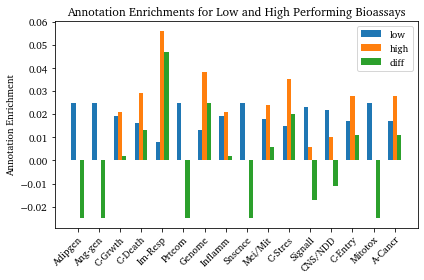

In [159]:
labels = df_annotations.columns.to_list()
other_means = df_annotations.iloc[0,:].values
men_means = df_annotations.iloc[1,:].values
women_means = df_annotations.iloc[2,:].values

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, df_annotations.iloc[0,:].values, width, label=df_annotations.index[0])
rects2 = ax.bar(x, df_annotations.iloc[1,:].values, width, label=df_annotations.index[1])
rects3 = ax.bar(x + width, df_annotations.iloc[2,:].values, width, label=df_annotations.index[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Annotation Enrichment')
ax.set_title('Annotation Enrichments for Low and High Performing Bioassays')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

fig.tight_layout()

# plt.savefig('../_output/annotation_enrichment_bar.svg',bbox_inches='tight')
# plt.savefig('../_output/annotation_enrichment_bar.png',bbox_inches='tight')

plt.show()


In [160]:
# export the dataframe to a csv file into the output directory
# df_annotations.to_csv('../_output/comp_freq_annot.csv',index=1)

# pd.read_csv('../_output/comp_freq_annot.csv', index_col=0)

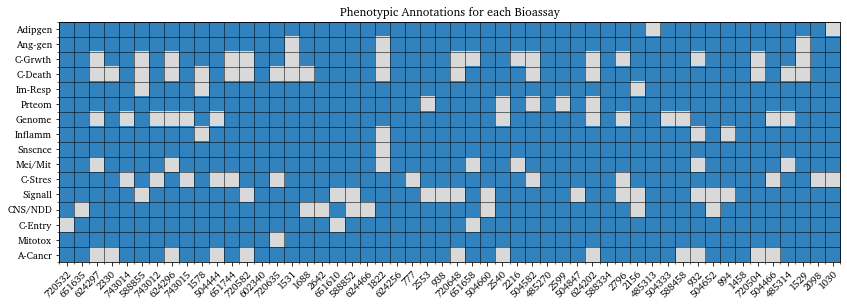

In [169]:
plt.figure(figsize=[14,12])

im = plt.imshow(aid_annotation.values.T,interpolation='none',aspect='equal',cmap='tab20c') # 'summer' 'RdBu' 'Spectral' 'seismic'tab10 tab20 tab20c with black lines

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 52, 1))
ax.set_yticks(np.arange(0, 16, 1))

# Labels for major ticks
ax.set_xticklabels(aid_annotation.T.columns.to_list())
ax.set_yticklabels(aid_annotation.T.index.to_list())

# Minor ticks
ax.set_xticks(np.arange(-.5, 52, 1), minor=True)
ax.set_yticks(np.arange(-.5, 16, 1), minor=True)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title('Phenotypic Annotations for each Bioassay')
# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=.52)
# plt.savefig('../_output/phenotypic_annotations.svg',bbox_inches='tight')
# plt.savefig('../_output/phenotypic_annotations.png',bbox_inches='tight')
# plt.savefig('../_output/phenotypic_annotations.pdf',bbox_inches='tight')

In [84]:
#create a latex ready table of the aid annotations
aid_annot = pd.read_csv('../../01-FilteringAssays/ml_ready/AID_description.txt',sep='\t',index_col=0)
aid_annot = aid_annot.T
aid_annot = aid_annot.iloc[:16,:11]

In [85]:
aid_annot.to_csv('../_output/AID_description_latex.txt')